In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result
from utils import extract_details_from_rxnid

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
df_kapp = pd.read_excel('../results/kapp_inPerSec.xlsx')
df_kapp.index = df_kapp.id.to_list()

casesC = pd.read_csv('../input/data_list_clim.txt', sep='\t')
casesC = casesC.data_id.to_list()

casesbatch = pd.read_csv('../input/data_list_batch.txt', sep='\t')
casesbatch = casesbatch.data_id.to_list()

In [3]:
clim_0 = pd.core.series.Series(dtype='float64')
df = df_kapp.loc[:, casesC]
for i in df.index:
    vals = [v for v in df.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        clim_0[i] = np.max(vals)
        
batch_0 = pd.core.series.Series(dtype='float64')
df = df_kapp.loc[:, casesbatch]
for i in df.index:
    vals = [v for v in df.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        batch_0[i] = np.max(vals)

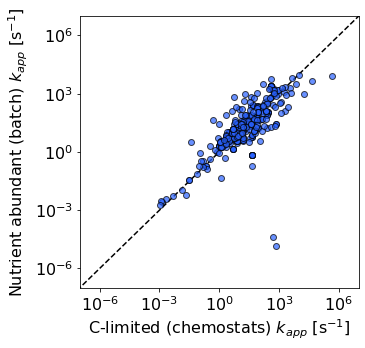

In [4]:
idx = sorted(list(set(clim_0.index) & set(batch_0.index)))
clim = np.log10(clim_0[idx])
batch = np.log10(batch_0[idx])

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(clim, batch, color='#2962ff', edgecolor='k', alpha=0.7, zorder=1);

lims = [-7, 7]
ticks = [-6, -3, 0, 3, 6]
ticklabels = ['$10^{' + str(i) + '}$' for i in ticks]
ax.set_xlim(lims);
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels, fontsize=16)
ax.set_ylim(lims);
ax.set_yticks(ticks)
ax.set_yticklabels(ticklabels, fontsize=16)

line = mlines.Line2D([-8, 8], [-8, 8], color='k', linestyle='--', zorder=0)
ax.add_line(line);

ax.set_xlabel('C-limited (chemostats) $k_{app}$ [s$^{-1}$]', fontsize=16);
ax.set_ylabel('Nutrient abundant (batch) $k_{app}$ [s$^{-1}$]', fontsize=16);

plt.savefig('./figures/kapp_all_batch_vs_Clim_scatter.png', transparent=True, bbox_inches='tight')